In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

2018/3/26 16:47: Calling OOMMF (skyrmion/skyrmion.mif) ... [2.2s]


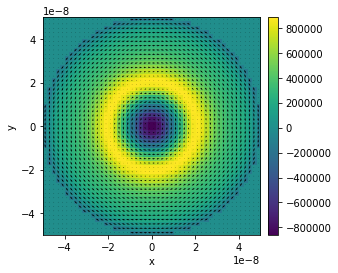

In [3]:
diametre = 100e-9
thickness = 10e-9
d = 2e-9

mesh = oc.Mesh(p1=(-diametre/2, -diametre/2, 0), p2=(diametre/2, diametre/2, thickness), cell=(d, d, d))

system = oc.System(name="skyrmion")

def Ms_fun(pos):
    x, y, z = pos
    if x**2 + y**2 <= (diametre/2)**2:
        return 8.84e5
    else:
        return 0
    
def m_init(pos):
    x, y, z = pos
    if x**2 + y**2 <= (20e-9)**2:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

system.hamiltonian = oc.Exchange(A=8.78e-12) + oc.DMI(D=1.58e-3, crystalclass="t") + oc.Demag() + oc.Zeeman(H=(0, 0, 2e5))
system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

md = oc.MinDriver()
md.drive(system)
system.m.plot_plane("z")